In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('student-por 2.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
print(df.describe())
df.shape

              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.0510

(649, 33)

In [32]:
college_df = df[df['higher'] == 'yes']
no_college_df = df[df['higher'] == 'no']
college_df.shape
no_college_df.shape

(69, 34)

In [20]:
print(college_df[college_df['age'] > 15].shape)
college_df[college_df['age'] >= 14].shape

(471, 33)


(580, 33)

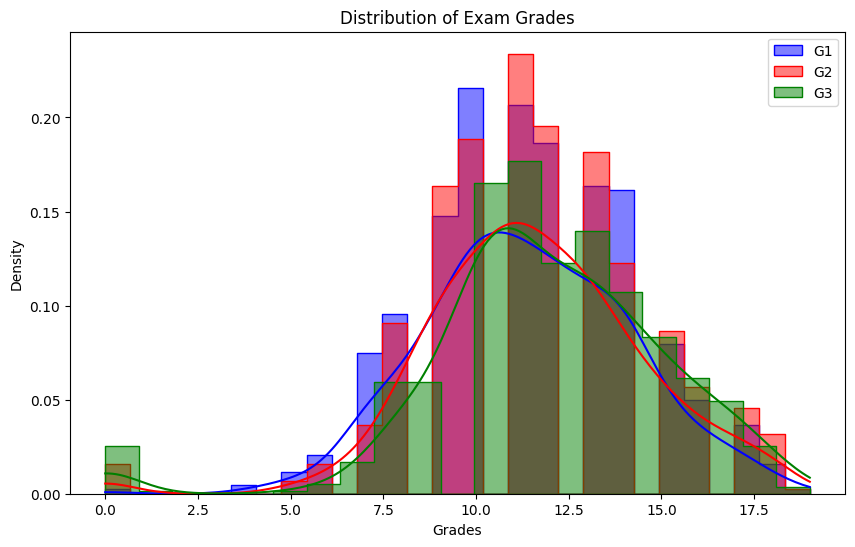

G1 mean 11.399075500770415
G2 mean 11.570107858243452
G3 mean 11.906009244992296


In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='G1', kde=True, element='step', label='G1', color='blue', stat='density')
sns.histplot(data=df, x='G2', kde=True, element='step', label='G2', color='red', stat='density')
sns.histplot(data=df, x='G3', kde=True, element='step', label='G3', color='green', stat='density')
plt.title('Distribution of Exam Grades')
plt.xlabel('Grades')
plt.ylabel('Density')
plt.legend()
plt.show()
print('G1 mean', np.mean(df['G1']))
print('G2 mean', np.mean(df['G2']))
print('G3 mean', np.mean(df['G3']))

In [33]:
print('College Plans G1 mean', np.mean(college_df['G1']))
print('College Plans G2 mean', np.mean(college_df['G2']))
print('College Plans G3 mean', np.mean(college_df['G3']))
print('No College Plans G1 mean', np.mean(no_college_df['G1']))
print('No College Plans G2 mean', np.mean(no_college_df['G2']))
print('No College Plans G3 mean', np.mean(no_college_df['G3']))

College Plans G1 mean 11.729310344827587
College Plans G2 mean 11.903448275862068
College Plans G3 mean 12.275862068965518
No College Plans G1 mean 8.623188405797102
No College Plans G2 mean 8.768115942028986
No College Plans G3 mean 8.797101449275363


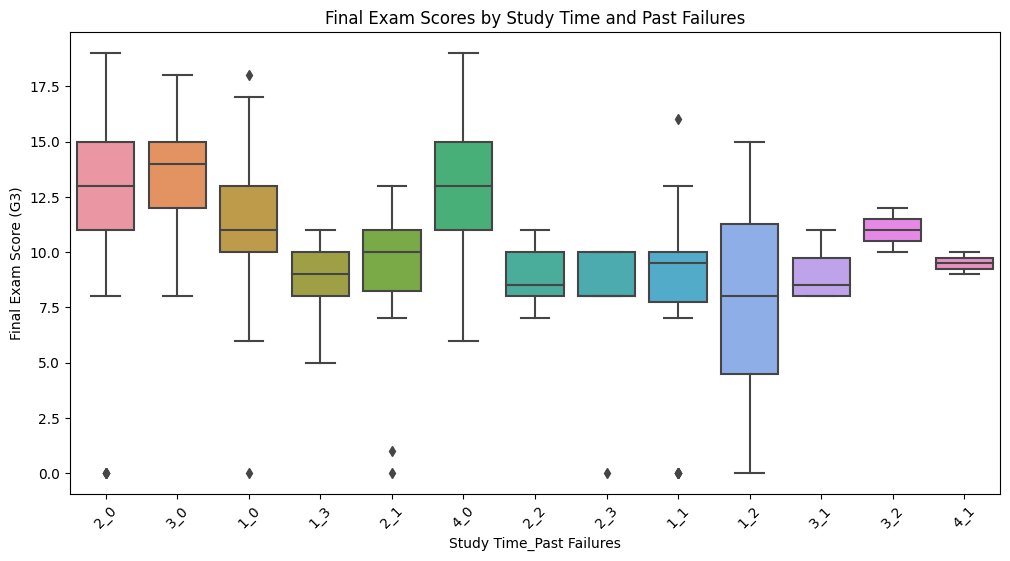

In [27]:
# Creating a new feature for better visualization
df['StudyTime_Failures'] = df['studytime'].astype(str) + '_' + df['failures'].astype(str)

plt.figure(figsize=(12, 6))
sns.boxplot(x='StudyTime_Failures', y='G3', data=df)
plt.title('Final Exam Scores by Study Time and Past Failures')
plt.xticks(rotation=45)
plt.xlabel('Study Time_Past Failures')
plt.ylabel('Final Exam Score (G3)')
plt.show()


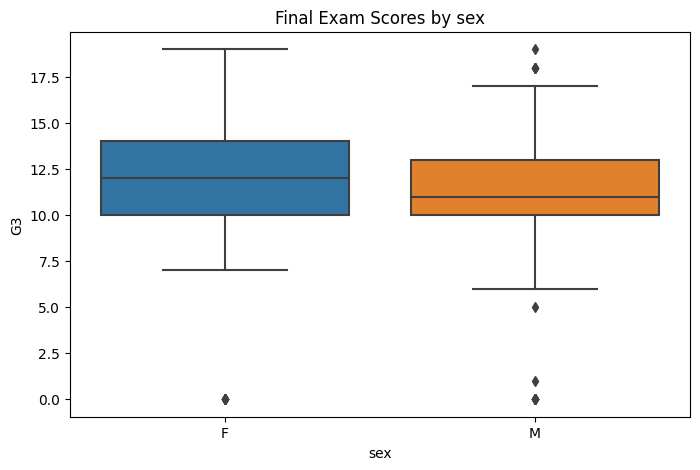

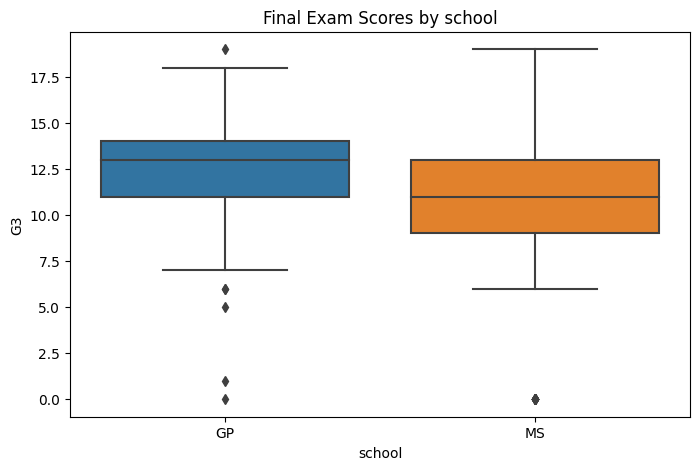

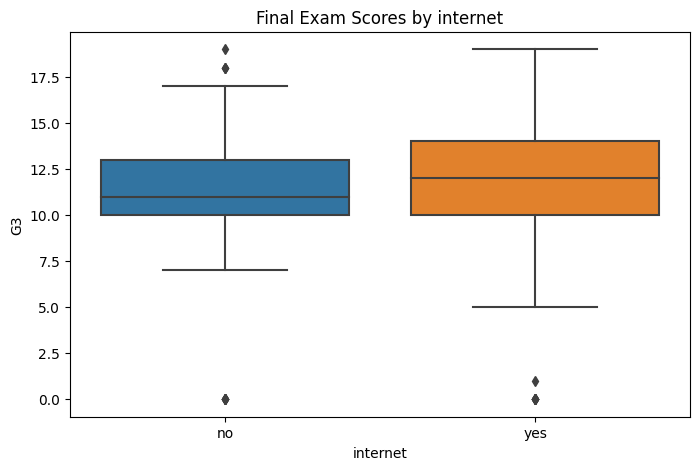

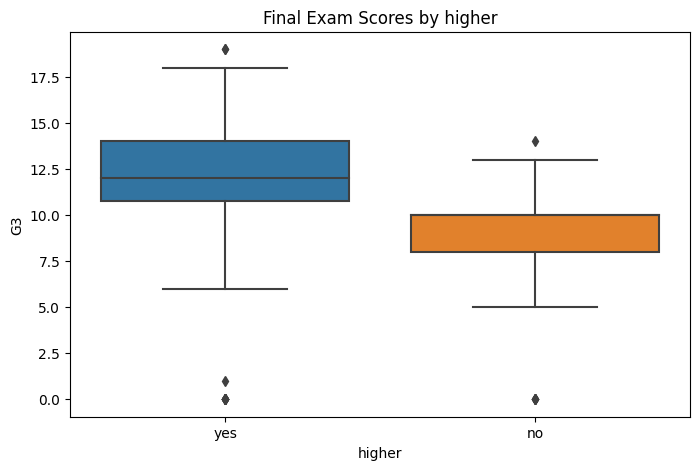

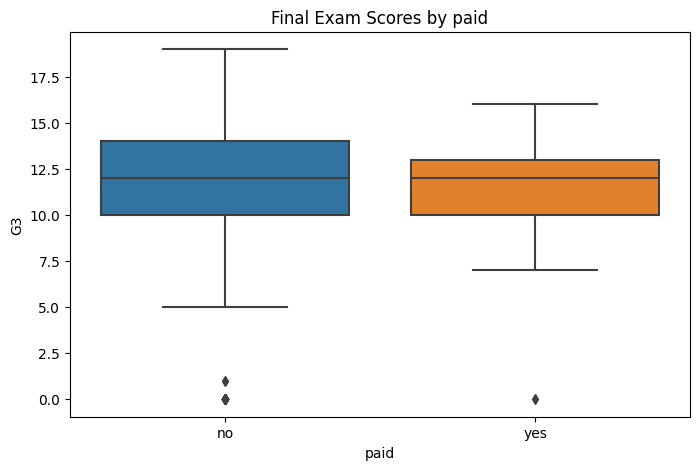

In [34]:
# Categorical variables to explore
categorical_features = ['sex', 'school', 'internet', 'higher', 'paid']

# Box plots for exam scores by categorical variables
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=feature, y='G3', data=df)
    plt.title(f'Final Exam Scores by {feature}')
    plt.show()


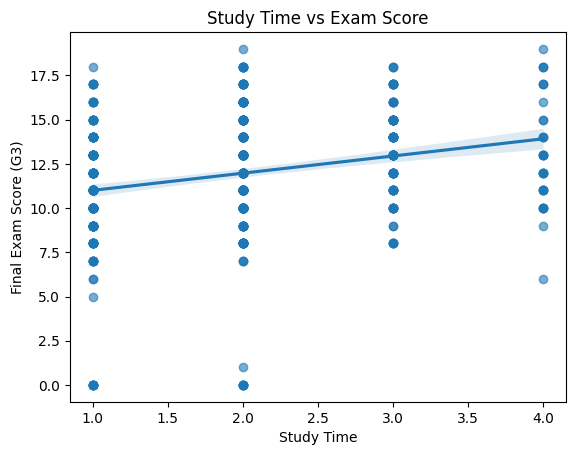

In [42]:
sns.regplot(x='studytime', y='G3', data=df, scatter_kws={'alpha':0.6})
plt.title('Study Time vs Exam Score')
plt.xlabel('Study Time')
plt.ylabel('Final Exam Score (G3)')
plt.show()

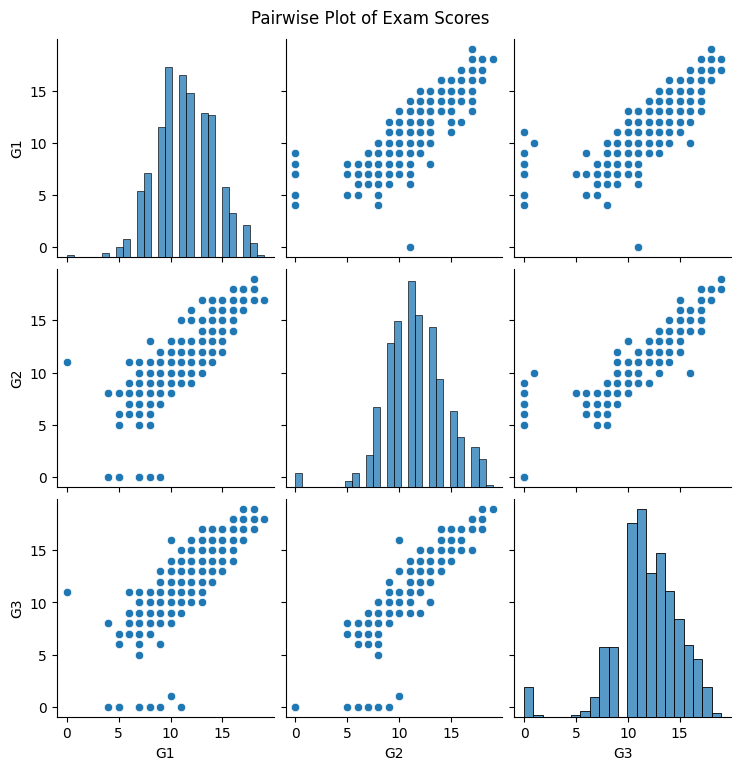

In [43]:
sns.pairplot(df[['G1', 'G2', 'G3']])
plt.suptitle('Pairwise Plot of Exam Scores', y=1.02)
plt.show()

In [45]:
smart_df = college_df[(college_df['paid'] == 'yes')]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,StudyTime_Failures
18,GP,M,17,U,GT3,T,3,2,services,services,...,5,5,2,4,5,2,8,8,7,1_3
21,GP,M,15,U,GT3,T,4,4,health,health,...,4,2,1,1,5,0,11,12,12,1_0
28,GP,M,16,U,LE3,A,3,4,services,other,...,3,3,1,1,5,2,12,12,13,2_0
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,4,5,5,5,5,4,12,11,12,2_0
30,GP,M,15,U,GT3,T,4,4,health,services,...,4,2,3,4,5,0,10,11,11,2_0
45,GP,F,15,U,LE3,A,4,3,other,other,...,2,2,1,1,5,4,10,11,11,2_0
59,GP,F,16,U,GT3,T,4,2,services,other,...,2,3,1,1,5,2,16,15,16,2_0
83,GP,M,15,U,LE3,T,2,2,services,services,...,3,3,1,3,4,2,13,12,13,2_0
95,GP,F,15,R,GT3,T,1,1,at_home,other,...,1,2,1,1,1,4,13,13,13,4_0
96,GP,M,16,R,GT3,T,4,3,services,other,...,3,3,1,1,4,6,9,11,11,1_0


In [49]:
help_df = college_df[college_df['schoolsup'] == 'yes']
help_df.shape

(66, 34)

In [51]:
print('Number of students without internet: ', df[df['internet'] == 'no'].shape[0])
print('Number of students without family support: ', df[df['famsup'] == 'no'].shape[0])
print('Number of students with poor family relationships: ', df[df['famrel'] <= 2].shape[0])
print('Number of students with poor health: ', df[df['health'] <= 2].shape[0])

Number of students without internet:  151
Number of students without family support:  251
Number of students with poor family relationships:  51
Number of students with poor health:  168


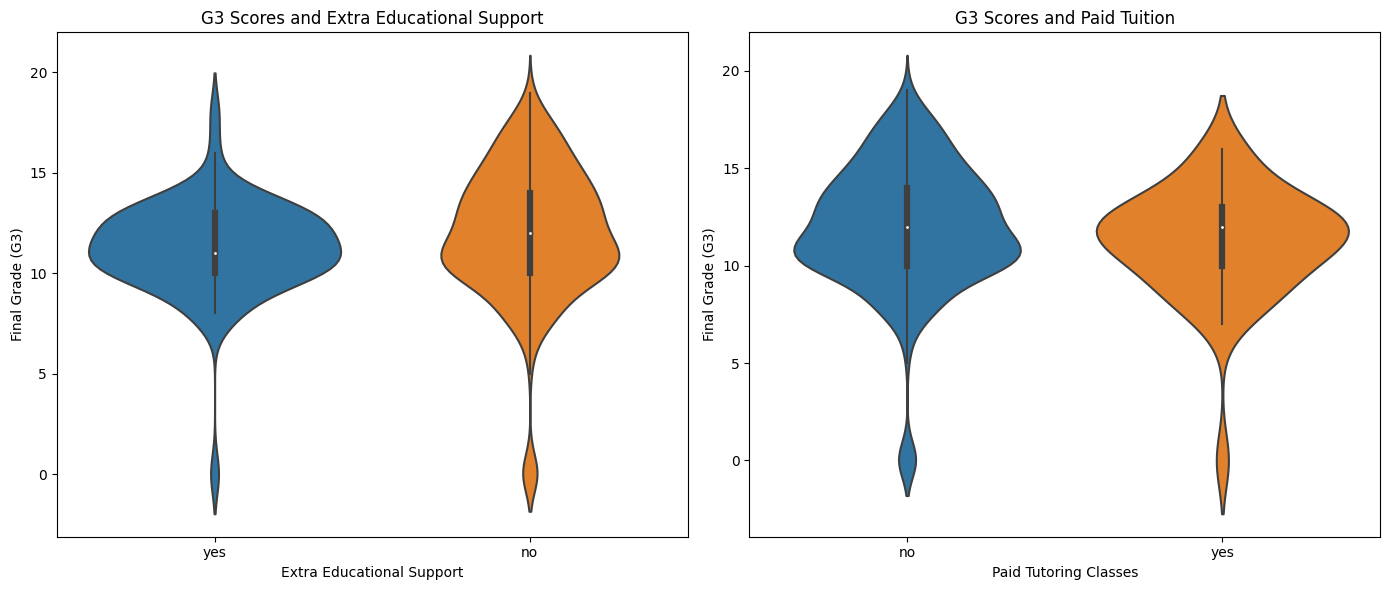

In [54]:
plt.figure(figsize=(14, 6))

# Violin plot for students with extra educational support
plt.subplot(1, 2, 1)
sns.violinplot(x='schoolsup', y='G3', data=df)
plt.title('G3 Scores and Extra Educational Support')
plt.xlabel('Extra Educational Support')
plt.ylabel('Final Grade (G3)')

# Violin plot for students with paid tuition
plt.subplot(1, 2, 2)
sns.violinplot(x='paid', y='G3', data=df)
plt.title('G3 Scores and Paid Tuition')
plt.xlabel('Paid Tutoring Classes')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

In [56]:
print('Average study time of person going to college:', np.mean(college_df['studytime']))
print('Average study time of person NOT going to college:', np.mean(no_college_df['studytime']))

Average study time of person going to college: 1.9844827586206897
Average study time of person NOT going to college: 1.4782608695652173


In [71]:
import pandas as pd

# Assuming df is your DataFrame and 'Variable1', 'Variable2' are your categorical variables
contingency_table = pd.crosstab(df['activities'], df['higher'])

print(contingency_table)
print('-------------------------------')
print('Break down of reason people joined this school')
print(df['reason'].value_counts())

higher      no  yes
activities         
no          40  294
yes         29  286
-------------------------------
Break down of reason people joined this school
course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64
